In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./train_processed.csv')

In [3]:
data.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5  2015-01-30   5577        616     1      1             0   
1      2          5  2015-01-30   5919        624     1      1             0   
2      3          5  2015-01-30   6911        678     1      1             0   
3      4          5  2015-01-30  13307       1632     1      1             0   
4      5          5  2015-01-30   5640        617     1      1             0   

   SchoolHoliday  
0              0  
1              0  
2              0  
3              0  
4              0

In [4]:
data.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  66900.000000  66900.000000  66900.000000  66900.000000  66900.000000   
mean     557.916622      4.005830   6338.682167    661.512257      0.817459   
std      321.544345      1.962357   4365.720737    497.418237      0.386293   
min        1.000000      1.000000      0.000000      0.000000      0.000000   
25%      281.000000      2.000000   3859.000000    407.000000      1.000000   
50%      557.000000      4.000000   6301.000000    635.000000      1.000000   
75%      837.000000      6.000000   8768.000000    887.000000      1.000000   
max     1115.000000      7.000000  37122.000000   4962.000000      1.000000   

              Promo  StateHoliday  SchoolHoliday  
count  66900.000000  66900.000000   66900.000000  
mean       0.428550      4.779761       0.180433  
std        0.494872     21.126568       0.384551  
min        0.000000      0.000000       0.000000  
25%        0.000000      0.000000       0.000000  
50%        0.000000      0.000000       0.000000  
75%        1.000000      0.000000       0.000000  
max        1.000000     99.000000       1.000000

In [5]:
data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday      int64
SchoolHoliday     int64
dtype: object

In [6]:
data.StateHoliday.unique()

array([ 0, 97, 99], dtype=int64)

In [7]:
data.StateHoliday = data.StateHoliday.astype(str)

In [8]:
def count_unique(column):
    return len(column.unique())

data.apply(count_unique, axis=0).astype(np.int32)

Store             1115
DayOfWeek            7
Date                66
Sales            13651
Customers         2638
Open                 2
Promo                2
StateHoliday         3
SchoolHoliday        2
dtype: int32

In [9]:
data.isnull().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [11]:
store_data = data[data.Store==150].sort_valuesplt.figure(figsize=(20, 10))
plt.scatter(x=store_data[data.Open==1].Promo, y=store_data[data.Open==1].Sales, alpha=0.1)('Date')
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(store_data.Sales[:365])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


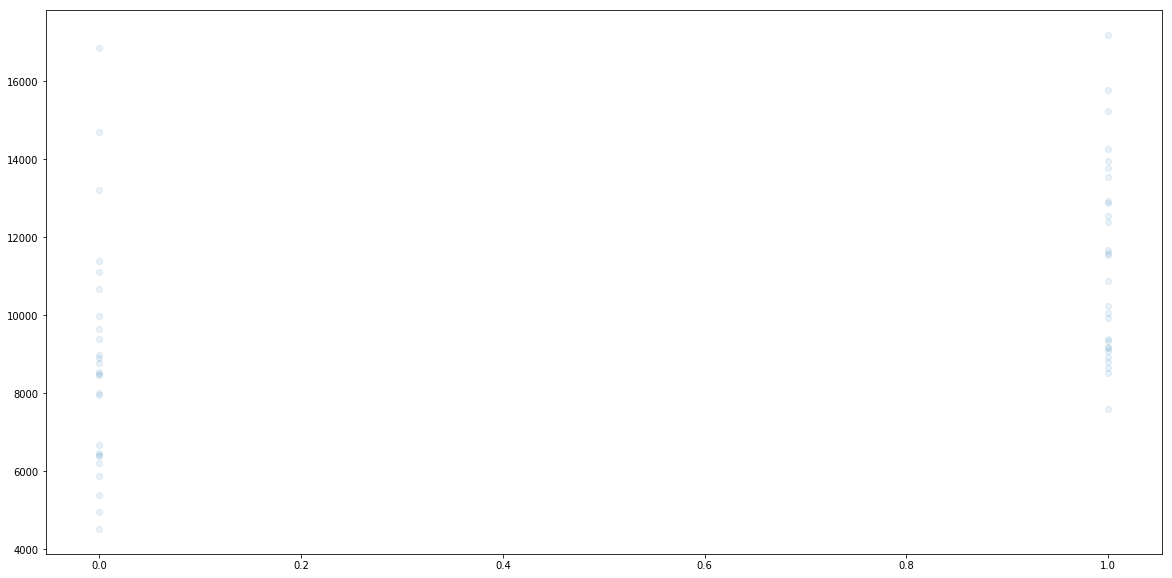

In [12]:
plt.figure(figsize=(20, 10))
plt.scatter(x=store_data[data.Open==1].Promo, y=store_data[data.Open==1].Sales, alpha=0.1)

In [13]:
transformed_data = data.drop(['Store', 'Date', 'Customers'], axis=1)

In [14]:
transformed_data = pd.get_dummies(transformed_data, columns=['DayOfWeek', 'StateHoliday'])

In [15]:
X = transformed_data.drop(['Sales'], axis=1).values
y = transformed_data.Sales.values
print("The training dataset has {} examples and {} features.".format(X.shape[0], X.shape[1]))

The training dataset has 66900 examples and 13 features.


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation as cv

In [27]:
lr = LinearRegression()
kfolds = cv.KFold(X.shape[0], n_folds=4, shuffle=True, random_state=42)
scores = cv.cross_val_score(lr, X, y, cv=kfolds)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.55 (+/- 0.00)


In [28]:
lr = LinearRegression()
X_store = pd.get_dummies(data[data.Store!=150], columns=['DayOfWeek', 'StateHoliday']).drop(['Sales', 'Store', 'Date', 'Customers'], axis=1).values
y_store = pd.get_dummies(data[data.Store!=150], columns=['DayOfWeek', 'StateHoliday']).Sales.values
lr.fit(X_store, y_store)
y_store_predict = lr.predict(pd.get_dummies(store_data, columns=['DayOfWeek', 'StateHoliday']).drop(['Sales', 'Store', 'Date', 'Customers'], axis=1).values)

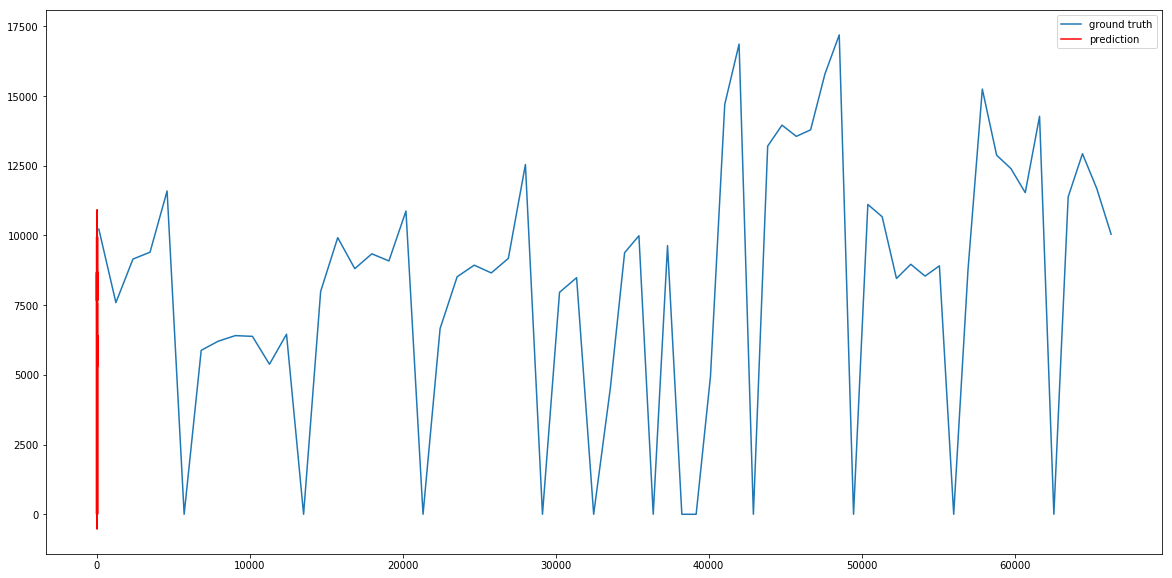

In [29]:
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(store_data.Sales[:365], label="ground truth")
plt.plot(y_store_predict[:365], c='r', label="prediction")
plt.legend()


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
cls = RandomForestClassifier()
cls.fit(X,y)
y_out2 = cls.predict(X)
accuracy = m.accuracy_score(y,y_out2)
print(cls)
print(accuracy)